In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.neighbors import KNeighborsClassifier  # KNN 분류 모델 사용
from sklearn import metrics  # 평가를 위한 라이브러리

### 1. 문제정의
- 500명의 키와, 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자

### 2. 데이터 수집
- BMI 데이터

In [2]:
tbl = pd.read_csv('data/bmi_500.csv', index_col = 'Label')
tbl.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [4]:
tbl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.6+ KB


In [5]:
tbl.describe() # 기술통계 확인

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [6]:
tbl.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

### 3. EDA

In [11]:
def myScatter(label, color):
    tmp = tbl.loc[label]
    plt.scatter(tmp['Weight'], tmp['Height'], c = color, label = label)
    # 그래프 그려주는 함수 (x축, y축, 색)

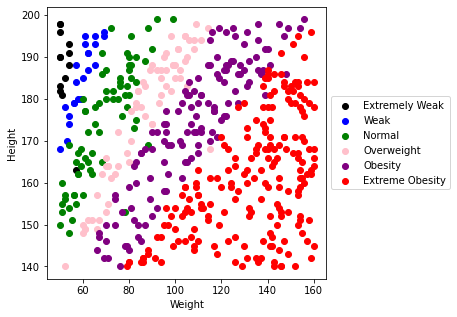

In [13]:
plt.figure(figsize = (5,5))  # 가로. 세로 크기 (표시할 도화지 만들기)
myScatter('Extremely Weak', 'black')
myScatter('Weak', 'blue')
myScatter('Normal', 'green')
myScatter('Overweight', 'pink')
myScatter('Obesity' , 'purple')
myScatter('Extreme Obesity', 'red')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [15]:
data = pd.read_csv('data/bmi_500.csv')

In [35]:
data.sample(frac=1).reset_index(drop = True)  # 좋은 데이터를 얻기 위해 데이터 섞기

,Gender,Height,Weight,Label
0,Male,195,153,Extreme Obesity
1,Female,158,149,Extreme Obesity
2,Female,197,114,Overweight
3,Male,171,147,Extreme Obesity
4,Female,185,110,Obesity
...,...,...,...,...
495,Male,196,116,Obesity
496,Male,185,60,Weak
497,Male,188,141,Obesity
498,Male,162,157,Extreme Obesity


In [17]:
data.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [18]:
# 학습할때는 문제와 답을 7:3 비율로 나눠야 한다.
X = data.loc[ : , 'Height':'Weight']
y = data.loc[ : , 'Label']

In [19]:
X.shape

(500, 2)

In [20]:
y.shape

(500,)

In [23]:
# X_train  -> 학습용 문제 데이터 (7에 해당함)
# X_test  ->  평가용 문제 데이터 (3에 해당함)
X_train = X.iloc[:350 , :]  # 데이터를 7:3의 비율로 나누기 때문에 0~350까지의 데이터를 가져옴
X_test = X.iloc[350:, :]

# y_train  -> 학습용 정답 데이터 (7에 해당함)
# y_test  ->  평가용 정답 데이터 (3에 해당함)

y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 2)
(150, 2)
(350,)
(150,)


### 4. 학습

In [ ]:
# knn 모델 하이퍼파라미터 디폴트 값
# n_neighbors = 5
# weights = 'uniform'
# metric = 'minkowski' (멘하튼, 유클리디안)
# p = 2  (1 = 멘하튼, 2 = 유클리디안)

In [36]:
knn_model = KNeighborsClassifier(n_neighbors = 10, weights = 'distance', metric = 'euclidean')

In [26]:
knn_model.fit(X_train, y_train)  # 학습하기

KNeighborsClassifier(n_neighbors=10)

In [27]:
pre = knn_model.predict(X_test)  # 컴퓨터가 예상한 답

In [28]:
metrics.accuracy_score(pre, y_test)  # 실제 답과 비교하기

0.9333333333333333

### 활용하기

In [32]:
knn_model.predict([[100, 100], [185, 120], [180,70], [172,70]])

array(['Extreme Obesity', 'Obesity', 'Normal', 'Normal'], dtype=object)